In [9]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

# Load an image from a URL
def load_image_from_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content)).convert('L')  # Convert to grayscale
    return np.array(img)

def rotate_image_forward(image, angle, fill_color=0):
    # Convert angle to radians
    angle_rad = np.radians(angle)
    cos_a, sin_a = np.cos(angle_rad), np.sin(angle_rad)

    # Get image dimensions
    height, width = image.shape[:2]

    # Create an output image filled with the fill_color
    output_image = np.full((height, width), fill_color, dtype=np.uint8)

    # Calculate the center of the image
    cx, cy = width // 2, height // 2

    # Iterate over each pixel in the original image
    for y in range(height):
        for x in range(width):
            # Calculate the new position for the pixel
            new_x = int(cos_a * (x - cx) - sin_a * (y - cy) + cx)
            new_y = int(sin_a * (x - cx) + cos_a * (y - cy) + cy)

            # Place the pixel in the new position if it's within bounds
            if 0 <= new_x < width and 0 <= new_y < height:
                output_image[new_y, new_x] = image[y, x]

    return output_image

def rotate_image_backward(image, angle, fill_color=0):
    # Convert angle to radians and calculate the sine and cosine
    angle_rad = np.radians(angle)  # Negative for reverse rotation
    cos_a, sin_a = np.cos(angle_rad), np.sin(angle_rad)

    # Get image dimensions
    height, width = image.shape[:2]

    # Create an output image filled with the fill color
    output_image = np.full((height, width), fill_color, dtype=np.uint8)

    # Calculate the center of the image
    cx, cy = width // 2, height // 2

    # Iterate over each pixel in the output image
    for y in range(height):
        for x in range(width):
            # Calculate the original position of this pixel
            orig_x = int( cos_a * (x - cx) + sin_a * (y - cy) + cx)
            orig_y = int(-sin_a * (x - cx) + cos_a * (y - cy) + cy)

            # Copy the pixel from the original image if it's within bounds
            if 0 <= orig_x < width and 0 <= orig_y < height:
                output_image[y, x] = image[orig_y, orig_x]

    return output_image

# URL of your image
image_url = 'https://i.stack.imgur.com/B2DBy.jpg'  # Replace with your image URL
image = load_image_from_url(image_url)

imageForward = rotate_image_forward(image,45)
imageBackward = rotate_image_backward(image,45)


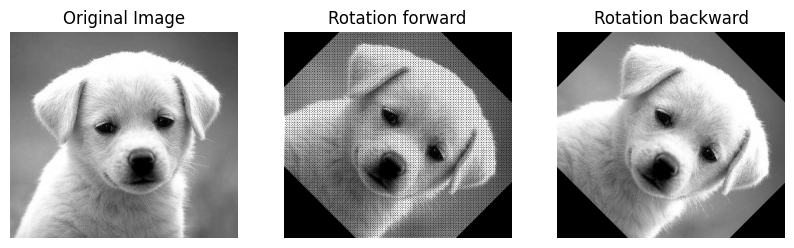

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(imageForward, cmap='gray')
ax[1].set_title("Rotation forward")
ax[1].axis('off')

ax[2].imshow(imageBackward, cmap='gray')
ax[2].set_title("Rotation backward")
ax[2].axis('off')

plt.show()